# Задание 5. Извлечение данных 

# Задание 5.1

Напишите скрипт, который скачивает  сообщения с Телеграм-канала https://t.me/Sputnik_results. \
Сохраните сообщения в формате по вашему выбору (.csv, .jsonl, sqlite, parquet, и т.д.). \
Откройте с помощью Pandas или аналогичных библиотек, постройте график числа сообщений в зависимости от даты. 

### Загрузка информации о пользователях и сообщений чата

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [12]:
users = pd.read_json('./telegram/user_data.json')
messages = pd.read_json('./telegram/channel_messages.json')

In [13]:
users

,id,first_name,last_name,user,phone,is_bot
0,1827183377,Ольга,None,None,NaN,False
1,803611400,Wssdt,None,Vp_RBG,NaN,False
2,5828338970,Евдокия,Захарова,None,NaN,False
3,1522409953,Republisher,None,re_publisher_bot,NaN,True
4,226663874,Koan,None,koan0,NaN,False
...,...,...,...,...,...,...
9995,875014173,GALINA,S,None,NaN,False
9996,596445342,drud,None,salvagerbox,NaN,False
9997,332438235,Your,Sister,YourTany,NaN,False
9998,1107695499,Anna,None,None,NaN,False


In [14]:
messages = messages[['date', 'message']]

In [15]:
dates = []
for date in messages['date']:
    new_date = date.strftime('%Y-%m')
    dates.append(new_date)
    
messages['date'] = dates

In [16]:
messages

,date,message
0,2022-12,"Пол, возраст, наличие хр.заболеваний укажите, ..."
1,2022-12,Конвасэл до сих пор не даёт полноценный QR код...
2,2022-12,Народные отчеты о вакцинации\n\n⚠️ ТОЛЬКО ПУБЛ...
3,2022-12,Dima32 Данный чат предназначен только для отчё...
4,2022-12,📣 ВЕСТНИК V1V2.ru выпуск #70 от 09.12.2022@09:...
...,...,...
31759,2020-12,NaN
31760,2020-12,NaN
31761,2020-12,NaN
31762,2020-12,NaN


**Удаление пустых сообщений**

In [17]:
n = len(messages)

In [18]:
messages.replace("", np.nan, inplace = True)
messages.dropna(inplace=True)

print(f"Было удалено {n-len(messages)} пустых сообщений.")
print(f"Число непустых сообщений в чате: {len(messages)}.")

Было удалено 8388 пустых сообщений.
Число непустых сообщений в чате: 23376.


### График числа сообщений в зависимости от даты

In [19]:
messages_per_month = messages.groupby(['date']).count()

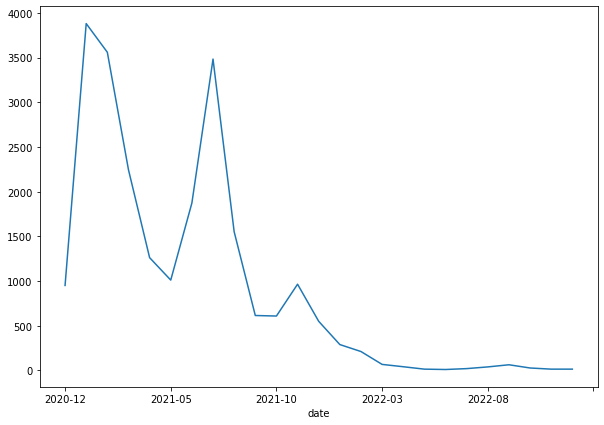

In [20]:
messages_per_month.plot(figsize=(10,7), legend=None)

# Задание 5.2
1. Напишите функции для извлечения данных из сообщений:
   - пол участника
   - возраст участника

Постройте диаграммы для визуализации. 

2. Реализуйте какой-либо анализ этих данных на ваше усмотрение. Например их можно кластеризовать и интерпретировать кластеры, или попробовать выделить статистику по среднему количеству антител в зависимости от возраста, или посчитать количество заболевших после вакцинации. Обязательна визуализация. 

## Пол участника

Регулярное выражение ищет следующий паттерн: [какие либо не буквенные символы] + **(м|муж|мужчина|ж|жен|женщина)** + [какие либо небуквенные символы].

In [21]:
pattern_gender = re.compile("[^а-я]+?(м|муж|мужчина|ж|жен|женщина)[^а-я]+?", re.IGNORECASE)

### Проверим работу на разных сообщениях

**Текст 1-го сообщения:** \
Дополняю и обобщаю #ревак \
Моя мама \
<u>**Ж**8</u>8, диабет 2 типа, ковидом не болела \
V1 21.01.2021, без "побочек", Спутник V ...

In [22]:
test_1 = "Дополняю и обобщаю:\n#ревак\nМоя мама\nЖ88, диабет 2 типа, ковидом не болела\nV1 21.01.2021, без побочек, Спутник V.\nV2 11.02.2021, без побочек, Спутник V.\n03.03.2021 - 84,3 ое/мл, DiaSorin (Хеликс)\nRV1 13.09.2021, без побочек, Спутник V.\nRV2 04.10.2021, без побочек, Спутник V .\n17.10.2021 - 665 BAU, Abbott (Инвитро).\nR2V1 (V5) 13.03.2022, без побочек, Спутник V.\nR2V2 (V6) 03.04.2022, без побочек, Спутник V.\n14.04.2022 - 205,7 BAU, Abbott (Инвитро).\nR3V1 (V7) 03.12.2022, без побочек, Спутник V плюс Ультрикс квадри."
res = re.search(pattern_gender, " " + test_1 + " ")
print(res[1])

Ж


**Текст 2-го сообщения:** \
Женщина, 39 лет. 1я вакцинация 9.12. Побочек не было никаких, даже тревожно)

In [23]:
test_2 = "Женщина, 39 лет. 1я вакцинация 9.12. Побочек не было никаких, даже тревожно)"
res = re.search(pattern_gender, " " + test_2 + " ")
print(res[1])

Женщина


**Текст 3-го сообщения:** \
Ж.47  Сутки после вакцинации (9.12.20).   К вечеру поднялась т 37.0,  головная боль как при гриппе и боль в области глаз, тахикардия 82-85, чуть выше давление, небольшая слабость.  боль в месте укола, к утру онемело плечо, озноб. В целом самочувствие удовлетворительное. \nРС. Страшно хочется карамели))

In [24]:
test_3 = "Ж.47  Сутки после вакцинации (9.12.20).   К вечеру поднялась т 37.0,  головная боль как при гриппе и боль в области глаз, тахикардия 82-85, чуть выше давление, небольшая слабость.  боль в месте укола, к утру онемело плечо, озноб. В целом самочувствие удовлетворительное. \nРС. Страшно хочется карамели))"
res = re.search(pattern_gender, " " + test_3 + " ")
print(res[1])

Ж


**Добавим информацию о поле в датафрейм**

In [25]:
gender_col = []

for message in messages['message']:
    gender = re.search(pattern_gender, " " + message + " ") 
    if gender:
        gender_col.append(gender[1][0].upper())
    else:
        gender_col.append(None)

messages['gender'] = gender_col   
messages.head(10)

,date,message,gender
0,2022-12,"Пол, возраст, наличие хр.заболеваний укажите, ...",None
1,2022-12,Конвасэл до сих пор не даёт полноценный QR код...,None
2,2022-12,Народные отчеты о вакцинации\n\n⚠️ ТОЛЬКО ПУБЛ...,None
3,2022-12,Dima32 Данный чат предназначен только для отчё...,None
4,2022-12,📣 ВЕСТНИК V1V2.ru выпуск #70 от 09.12.2022@09:...,None
5,2022-12,#назально #ревак #спутник-V\nМ33. 1 комп.: лег...,М
6,2022-12,"#ревак #назально первый этап 12.09, второй эт...",None
7,2022-12,#назально #ревак. Ж35. Хр. Заболевания: полива...,Ж
8,2022-12,📣 ВЕСТНИК V1V2.ru выпуск #70 от 09.12.2022@09:...,None
9,2022-12,"#ревак #назально\n11.12.22. Гум, Спутник+Ультр...",Ж


In [26]:
none_gender = messages['gender'].isnull().sum()

In [27]:
print(f"В {(none_gender/len(messages))*100:.2f}% сообщений не указан пол участника ({none_gender} сообщений).")

В 29.82% сообщений не указан пол участника (6971 сообщений).


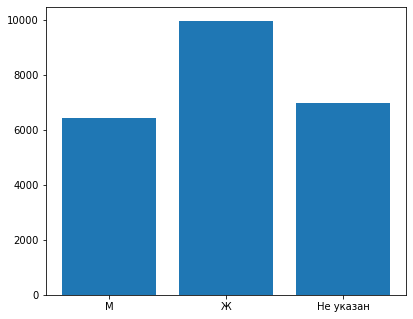

In [28]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0,0,0.5,0.5])
genders = ["М", "Ж", "Не указан"]
gender_statistics = [len(messages[ messages['gender'] == gender ]) for gender in genders[:2]] + [ len(messages[messages['gender'].isnull()])]
ax.bar(genders, gender_statistics)
plt.show()

## Возраст участника

Регулярное выражение ищет следующий паттерн: \
[буквы -ж -м -а -н/пробел/переход на следующую строку/открывающая скобка] + **(какая-либо цифра из интервала 1-9 + какая либо цифра из интервала 0-9)** + [запятая или точка](может и не быть) + [любая буква/пробел/переход на следующую строку/закрывающая скобка].

Таким образом, из любой из нижеприведенных строк будет выделен возраст: 
- же<u>н **34** </u>переболела ковидом, 
- Мужчин<u>а **29** </u>антитела 100
- женщина <u>(**35** </u>лет)
- <u>М**35** </u>ковид

In [29]:
pattern_age = re.compile("[жмна|\s|\n|\(]([1-9][0-9])[\,\.]?[а-я|\s|\n|\)]", re.IGNORECASE)

### Проверим работу на разных сообщениях

**Текст 1-го сообщения:** 
#назально #ревак. <u>Ж**35**</u>. Хр. Заболевания: поливалентная аллергия, средне тяжёлая БА. Ревак назалкой 15.12.22. До этого спутник 1,2, спутник лайт. Из побочек назальной: заложило ухо на 2 дня с той же стороны, что и ноздря, в которую брызгали.

In [30]:
test_1 = "#назально #ревак. Ж35. Хр. Заболевания: поливалентная аллергия, средне тяжёлая БА. Ревак назалкой 15.12.22. До этого спутник 1,2, спутник лайт. Из побочек назальной: заложило ухо на 2 дня с той же стороны, что и ноздря, в которую брызгали."
res = re.search(pattern_age, " " + test_1 + " ")
print(res[1])

35


**Текст 2-го сообщения:** \
Пол, возраст, наличие хр.заболеваний укажите, пожалуйста, редактированием своего сообщения.

In [31]:
test_2 = "Пол, возраст, наличие хр.заболеваний укажите, пожалуйста, редактированием своего сообщения."
res = re.search(pattern_age, " " + test_2 + " ")
print(res)

None


**Текст 3-го сообщения:** 
#ревак #назально \
11.12.22. Гум, Спутник+Ультрикс Квадри. \
Жен, 45.\
Никаких побочек. Наутро было чуть влажно в носу, но могло быть после прогулки в снегопад. В анамнезе 3*2 Спутник-V (последняя доза год назад в декабре), несколько заражений ковидом за весь период (2020-2022); заболевания протекали в виде обычная простуда, в т.ч. 2 раза бессимптомно. ПЦР всегда отрицательный, постдиагноз по антителам. Участник КИ Спутник-V.

In [32]:
test_3 = "#ревак #назально\n11.12.22. Гум, Спутник+Ультрикс Квадри. \nЖен, 45.\nНикаких побочек. Наутро было чуть влажно в носу, но могло быть после прогулки в снегопад. В анамнезе 3*2 Спутник-V (последняя доза год назад в декабре), несколько заражений ковидом за весь период (2020-2022); заболевания протекали в виде обычная простуда, в т.ч. 2 раза бессимптомно. ПЦР всегда отрицательный, постдиагноз по антителам. Участник КИ Спутник-V."
res = re.search(pattern_age, " " + test_3 + " ")
print(res[1])

45


**Добавим информацию о возрасте в датафрейм**

In [33]:
age_col = []

for message in messages['message']:
    age = re.search(pattern_age, ' '+ message + ' ') 
    if age:
        age_col.append(int(age[1]))
    else:
        age_col.append(None)

messages['age'] = age_col    
messages.head(10)

,date,message,gender,age
0,2022-12,"Пол, возраст, наличие хр.заболеваний укажите, ...",None,NaN
1,2022-12,Конвасэл до сих пор не даёт полноценный QR код...,None,NaN
2,2022-12,Народные отчеты о вакцинации\n\n⚠️ ТОЛЬКО ПУБЛ...,None,NaN
3,2022-12,Dima32 Данный чат предназначен только для отчё...,None,NaN
4,2022-12,📣 ВЕСТНИК V1V2.ru выпуск #70 от 09.12.2022@09:...,None,NaN
5,2022-12,#назально #ревак #спутник-V\nМ33. 1 комп.: лег...,М,33.0
6,2022-12,"#ревак #назально первый этап 12.09, второй эт...",None,NaN
7,2022-12,#назально #ревак. Ж35. Хр. Заболевания: полива...,Ж,35.0
8,2022-12,📣 ВЕСТНИК V1V2.ru выпуск #70 от 09.12.2022@09:...,None,NaN
9,2022-12,"#ревак #назально\n11.12.22. Гум, Спутник+Ультр...",Ж,45.0


In [34]:
none_age = messages['age'].isnull().sum()

In [35]:
print(f"В {(none_age/len(messages))*100:.2f}% сообщений не указан возраст участника ({none_age} сообщений).")

В 22.64% сообщений не указан возраст участника (5292 сообщений).


<BarContainer object of 7 artists>

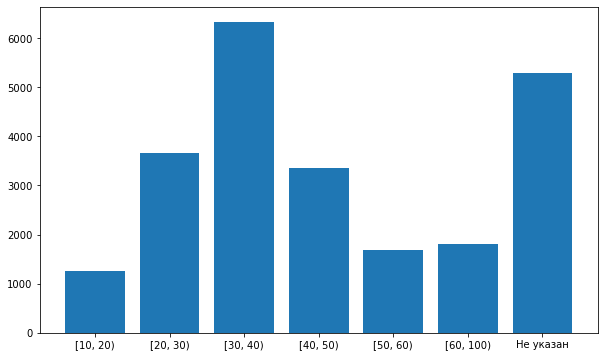

In [36]:
fig = plt.figure(figsize=(10,6))

split = [10, 20, 30, 40, 50, 60, 100]
intervals = [f"[{split[i]}, {split[i+1]})" for i in range(len(split)-1)] + ['Не указан']

age_statistics = [len(messages.loc[(messages['age'] >= split[i]) & (messages['age'] < split[i+1]) ] ) for i in range(len(split)-1)] + [len(messages[messages['age'].isnull()])]

plt.bar(intervals, age_statistics)

## Количество антител BAU/мл (BAU – «binding antibody units», «единицы связывающих антител»)

Регулярное выражение ищет следующий паттерн: \
[какой-либо нечисленный символ] + **(цифры из интервала 0-9 + точка/запятая(может и не быть) + цифры из интервала 0-9)** + [пробел/переход на следующую строку](может и не быть) + **(BAU|бау|б + пробел)**.

In [37]:
pattern_bau = re.compile("[^0-9](([0-9]+)[\,|\.]?([0-9]*))[\s|\n]?(BAU|бау|б\s)", re.IGNORECASE)

### Проверим работу на разных сообщениях

**Текст 1-го сообщения:**
#дети #verosell #синофарм Ж9. V1 24.08.22, V2 24.09.22. Минск, GreenPark. Оба раза реакция на вакцинацию однократный подъем температуры через 2-4 часа после вакцинации, головная боль. Общее состояние усталости и периодическая головная боль в течение 4-5 дней после вакцинации. АТ после вакцинации не измеряли (прим. ребенок болел однократно октябрь 2021, АТ через месяц после отрицательного теста около 200 бау по тесту Эббот, больше точно не болела, т.к. при усилении волны уходили на СО).

In [39]:
test_1 = "#дети #verosell #синофарм Ж9. V1 24.08.22, V2 24.09.22. Минск, GreenPark. Оба раза реакция на вакцинацию однократный подъем температуры через 2-4 часа после вакцинации, головная боль. Общее состояние усталости и периодическая головная боль в течение 4-5 дней после вакцинации. АТ после вакцинации не измеряли (прим. ребенок болел однократно октябрь 2021, АТ через месяц после отрицательного теста около 200 бау по тесту Эббот, больше точно не болела, т.к. при усилении волны уходили на СО)."
res = re.search(pattern_bau, " " + test_3 + " ")
print(res)

None


**Текст 2-го сообщения:**
#ревак #назально \
15.08.2022 IgG к RBD 407 bau \
02.09.22 rv1 спутник назально \
02.10.22 IgG к RBD S 497 bau \
IgM к S 1,47 (реф 1, болела неподтвержденно в феврале, работаю в мед организации)\
IgG к N белку 0\
03.10.22 rv2 спутник назально.\
Лёгкие гриппоподобные симптомы, боль в горле, темп 37.0 через 2 часа, потом НЯ быстро сошли на нет. Перенесла rv2 назально намного легче, чем rv1 назально. В/М Спутник v1 так же перенился намного тяжелее v2 в/м.

In [40]:
test_2 = "#ревак #назально\n15.08.2022 IgG к RBD 407 bau\n02.09.22 rv1 спутник назально\n02.10.22 IgG к RBD S 497 bau\n                 IgM к S 1,47 (реф 1, болела неподтвержденно в феврале, работаю в мед организации)\n                  IgG к N белку 0\n03.10.22 rv2 спутник назально.\nЛёгкие гриппоподобные симптомы, боль в горле, темп 37.0 через 2 часа, потом НЯ быстро сошли на нет. Перенесла rv2 назально намного легче, чем rv1 назально. В/М Спутник v1 так же перенился намного тяжелее v2 в/м."
res = re.search(pattern_bau, " " + test_2 + " ")
print(res[1])

407


**Текст 2-го сообщения:**
#ревак #назально \
Не болела. \
30.04.22 IgG к RBD 25 bau (реф 7)\
03.10.22 Rv1 спутник назально\
Незначительная слабость 2 часа после вакцинации.

In [41]:
test_3 = "#ревак #назально \nНе болела. \n30.04.22 IgG к RBD 25 bau (реф 7)\n03.10.22 Rv1 спутник назально\nНезначительная слабость 2 часа после вакцинации."
res = re.search(pattern_bau, " " + test_3 + " ")
print(res[1])

25


**Добавим информацию о количестве антител в датафрейм**

In [42]:
bau_col = []

for message in messages['message']:
    bau = re.search(pattern_bau, " " + message + " ") 
    if bau:
        bau_col.append(float( f"{bau[2]}.{bau[3]}" ))
    else:
        bau_col.append(None)

messages['BAU'] = bau_col    
messages.head(20)

,date,message,gender,age,BAU
0,2022-12,"Пол, возраст, наличие хр.заболеваний укажите, ...",None,NaN,NaN
1,2022-12,Конвасэл до сих пор не даёт полноценный QR код...,None,NaN,NaN
2,2022-12,Народные отчеты о вакцинации\n\n⚠️ ТОЛЬКО ПУБЛ...,None,NaN,NaN
3,2022-12,Dima32 Данный чат предназначен только для отчё...,None,NaN,NaN
4,2022-12,📣 ВЕСТНИК V1V2.ru выпуск #70 от 09.12.2022@09:...,None,NaN,NaN
5,2022-12,#назально #ревак #спутник-V\nМ33. 1 комп.: лег...,М,33.0,NaN
6,2022-12,"#ревак #назально первый этап 12.09, второй эт...",None,NaN,NaN
7,2022-12,#назально #ревак. Ж35. Хр. Заболевания: полива...,Ж,35.0,NaN
8,2022-12,📣 ВЕСТНИК V1V2.ru выпуск #70 от 09.12.2022@09:...,None,NaN,NaN
9,2022-12,"#ревак #назально\n11.12.22. Гум, Спутник+Ультр...",Ж,45.0,NaN


In [43]:
none_bau = messages['BAU'].isnull().sum()

In [44]:
print(f"Информация о количестве антител содержится в {( 1 - none_bau/len(messages) )*100:.2f}% сообщений ({len(messages) - none_bau} сообщений).")

Информация о количестве антител содержится в 4.17% сообщений (975 сообщений).


## Анализ: средний показатель BAU в зависимости от возраста

<BarContainer object of 6 artists>

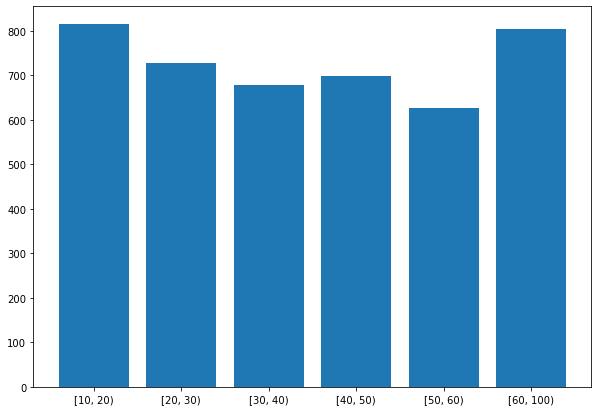

In [45]:
fig = plt.figure(figsize=(10,7))

split = [10, 20, 30, 40, 50, 60, 100]
intervals = [f"[{split[i]}, {split[i+1]})" for i in range(len(split)-1)]
bau_statistics = [messages.loc[(messages['age'] >= split[i]) & (messages['age'] < split[i+1]) & (~messages['BAU'].isnull()), ['BAU']].mean().values[0] for i in range(len(split)-1) ]

plt.bar(intervals, bau_statistics)